In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

 55000 10000 5000

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)


In [2]:
learning_rate = 0.001
epochs = 30
batch_size = 100

In [3]:
X = tf.placeholder(tf.float32, [None, 784])

T = tf.placeholder(tf.float32, [None, 10])

A1 = tf.reshape(X, [-1, 28, 28, 1])

In [4]:
W2 = tf.Variable(tf.random_normal([4, 4, 1, 32], stddev = 0.01))

b2 = tf.Variable(tf.constant(0.1, shape = [32]))

C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

Z2 = tf.nn.relu(C2 + b2)

A2 = P2 = tf.nn.max_pool(Z2, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
W3 = tf.Variable(tf.random_normal([5, 5, 32, 64], stddev = 0.01))

b3 = tf.Variable(tf.constant(0.1, shape = [64]))

C3 = tf.nn.conv2d(A2, W3, strides=[1,1,1,1], padding='SAME')

Z3 = tf.nn.relu(C3 + b3)

A3 = P3 = tf.nn.max_pool(Z3, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
W4 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev = 0.01))

b4 = tf.Variable(tf.constant(0.1, shape = [128]))

C4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')

Z4 = tf.nn.relu(C4 + b4)

A4 = P4 = tf.nn.max_pool(Z4, ksize= [1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [7]:
A4_flat = P4_flat = tf.reshape(A4, [-1,4*4*128])

W5 = tf.Variable(tf.random_normal([4*4*128, 256], stddev = 0.01))

b5 = tf.Variable(tf.random_normal([256]))

Z5 = tf.matmul(A4_flat, W5) + b5

A5 = tf.nn.relu(Z5)

In [8]:
W6 = tf.Variable(tf.random_normal([256, 10], stddev = 0.01))

b6 = tf.Variable(tf.random_normal([10]))

Z6 = tf.matmul(A5, W6) + b6

y = A6 = tf.nn.softmax(Z6)

In [9]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = T, logits = y))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [10]:
predicted_val = tf.equal(tf.argmax(y , 1), tf.argmax(T, 1))

accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype = tf.float32))

accuracy_index = tf.cast(predicted_val, dtype = tf.float32)

predicted_list = tf.argmax(y, 1)

In [11]:
save_path = './CNN_train_model1.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    start_time = datetime.now()
    
    for i in range(epochs):
        total_batch = int(mnist.train.num_examples / batch_size)
        for step in range(total_batch):
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
            
            loss_val,_ = sess.run([loss, train], feed_dict = {X : batch_x_data, T : batch_t_data})
            
            if step % 100 == 0:
                print("epochs = ", i ,", step = ", step, ", loss_val = ", loss_val)
    end_time = datetime.now()
    print("\nelapsed time = ", end_time - start_time)
    saver.save(sess, save_path)

epochs =  0 , step =  0 , loss_val =  2.3147464
epochs =  0 , step =  100 , loss_val =  2.2853103
epochs =  0 , step =  200 , loss_val =  1.7986329
epochs =  0 , step =  300 , loss_val =  1.7546494
epochs =  0 , step =  400 , loss_val =  1.6616068
epochs =  0 , step =  500 , loss_val =  1.7262326
epochs =  1 , step =  0 , loss_val =  1.7194513
epochs =  1 , step =  100 , loss_val =  1.6371994
epochs =  1 , step =  200 , loss_val =  1.6545683
epochs =  1 , step =  300 , loss_val =  1.6603076
epochs =  1 , step =  400 , loss_val =  1.6633972
epochs =  1 , step =  500 , loss_val =  1.7195795
epochs =  2 , step =  0 , loss_val =  1.7055119
epochs =  2 , step =  100 , loss_val =  1.690294
epochs =  2 , step =  200 , loss_val =  1.6358464
epochs =  2 , step =  300 , loss_val =  1.7215387
epochs =  2 , step =  400 , loss_val =  1.5898101
epochs =  2 , step =  500 , loss_val =  1.582427
epochs =  3 , step =  0 , loss_val =  1.5778165
epochs =  3 , step =  100 , loss_val =  1.5619453
epochs =  

epochs =  27 , step =  200 , loss_val =  1.4736856
epochs =  27 , step =  300 , loss_val =  1.4611502
epochs =  27 , step =  400 , loss_val =  1.4611505
epochs =  27 , step =  500 , loss_val =  1.4611505
epochs =  28 , step =  0 , loss_val =  1.471151
epochs =  28 , step =  100 , loss_val =  1.4611505
epochs =  28 , step =  200 , loss_val =  1.4711167
epochs =  28 , step =  300 , loss_val =  1.4611502
epochs =  28 , step =  400 , loss_val =  1.462934
epochs =  28 , step =  500 , loss_val =  1.4611504
epochs =  29 , step =  0 , loss_val =  1.4612008
epochs =  29 , step =  100 , loss_val =  1.4615614
epochs =  29 , step =  200 , loss_val =  1.4811515
epochs =  29 , step =  300 , loss_val =  1.4619435
epochs =  29 , step =  400 , loss_val =  1.4702731
epochs =  29 , step =  500 , loss_val =  1.4679621

elapsed time =  0:43:44.791910


In [12]:
index_label_prediction_list = []
with tf.Session() as sess:
    saver.restore(sess, save_path)
    test_x_data = mnist.test.images
    test_t_data = mnist.test.labels
    
    accuracy_val , predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict = {X : test_x_data, T : test_t_data})
    
    print("")
    print("Accuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    # numpy type으로 디버그
    temp_list = []
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
    
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./CNN_train_model1.ckpt

Accuracy =  0.9904
type(accuracy_val) =  <class 'numpy.float32'> , type(predicted_list_val) =  <class 'numpy.ndarray'> , type(index_label) =  <class 'numpy.ndarray'>
index_label.shape =  (10000,)
length of index_label_list =  10000
false label count =  96

length of index_label_false_list 96


In [13]:
print(index_label_prediction_list)

[[321, 2, 7], [336, 9, 4], [340, 5, 3], [445, 6, 0], [449, 3, 5], [471, 9, 7], [582, 8, 2], [583, 2, 7], [646, 2, 6], [659, 2, 1], [674, 5, 3], [716, 1, 7], [717, 0, 5], [726, 7, 3], [916, 4, 2], [924, 2, 7], [947, 8, 9], [1014, 6, 5], [1232, 9, 4], [1247, 9, 5], [1299, 5, 7], [1393, 5, 3], [1394, 8, 2], [1459, 2, 7], [1522, 7, 9], [1527, 1, 3], [1654, 2, 7], [1709, 9, 8], [1790, 2, 7], [1878, 8, 3], [1901, 9, 4], [1909, 1, 7], [2018, 1, 7], [2093, 8, 2], [2098, 2, 0], [2118, 6, 0], [2129, 9, 8], [2130, 4, 9], [2135, 6, 1], [2182, 1, 3], [2293, 9, 4], [2582, 9, 7], [2597, 5, 3], [2654, 6, 1], [2896, 8, 0], [2927, 3, 7], [2939, 9, 5], [2953, 3, 5], [2959, 2, 3], [3060, 9, 7], [3062, 8, 3], [3343, 8, 2], [3422, 6, 0], [3475, 3, 7], [3520, 6, 4], [3559, 8, 5], [3599, 2, 7], [3626, 8, 3], [3780, 4, 6], [3794, 8, 3], [3808, 7, 2], [3850, 9, 4], [3853, 6, 0], [3859, 9, 4], [3906, 1, 3], [4078, 9, 8], [4163, 9, 7], [4176, 2, 7], [4201, 1, 7], [4207, 8, 2], [4369, 9, 4], [4497, 8, 7], [4507, 1

10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
80 image is saved now
90 image is saved now
Elapsed Time =  0:00:22.867830
Total  96  data is saved


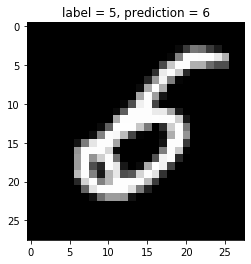

In [14]:
# check false data
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()

#image 저장할 디렉토리 생성, 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'CNN_1Conv_Adam_'
dir_name = algorithm_name + str(now.year) + '-' + str(now.month) + '-' +str(now.day) + '-' + str(now.hour) + str(now.minute) + str(now.second)

os.mkdir(dir_name)

# change dir
os.chdir(dir_name)

start_time = datetime.now()

for list_data in index_label_prediction_list:
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
    
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)
    plt.imshow(img, cmap = 'gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + ', prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')
        
end_time = datetime.now()

print('Elapsed Time = ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래 dir 로 복귀
os.chdir(curr_dir)